# INTERN NAME- VAISHNAVI DADMODE
SPARKS FOUNDATION

GRIP-OCTOBER21-DATA SCIENCE INTERNSHIP

BEGINNER LEVEL TASK 1

SIMPLE LINEAR REGRESSION

PREDICT THE SCORES OF A STUDENT BASED ON NUMBER OF STUDY HOURS

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading 
url =  "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Collecting X and Y 
X=data['Hours'].values
Y=data['Scores'].values

# Performing Simple Linear Regression

In [9]:
#Mean X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)
#Total number of values
n=len(X)
#Using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)
#Print coefficients
print(b1,b0)

9.775803390787475 2.4836734053731746


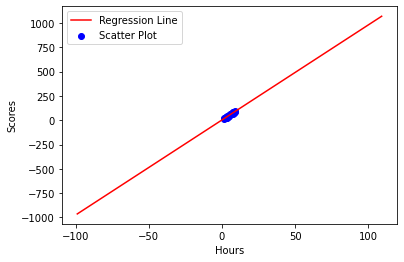

In [10]:
#Plotting Values and Regression Line
max_x=np.max(X)+100
min_x=np.min(X)-100
#Calculating line values x and y
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
#Plotting Line
plt.plot(x,y,color='red',label='Regression Line')
#Plotting Scatter Points
plt.scatter(X,Y,c='blue',label='Scatter Plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [11]:
#R-squared method 
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.9529481969048356


In [12]:
#Creating Model using Scikit Learn Library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Cannot use Rank 1 matrix in scikit Learn
X=X.reshape((n,1))
#Creating Model
reg=LinearRegression()
#Fitting training data
reg=reg.fit(X,Y)
#Y Prediction
Y_pred=reg.predict(X)
#Calculating R2 Score
r2_score=reg.score(X,Y)
print(r2_score)

0.9529481969048356


Plot of Hours V Percentage Score

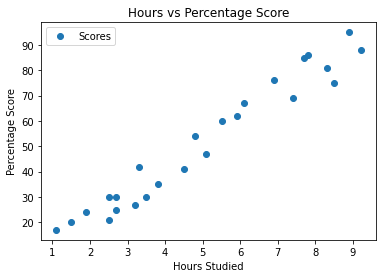

In [13]:
data.plot(x ='Hours', y ='Scores',style = 'o')
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


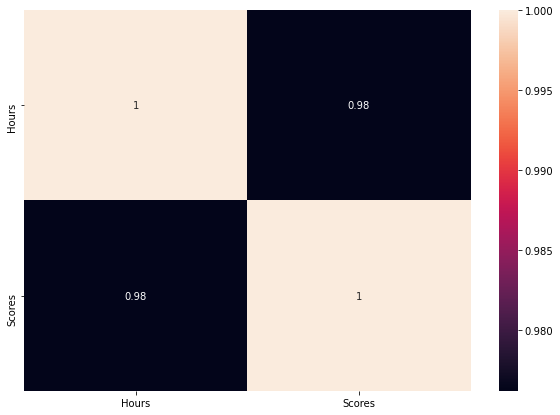

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot = True)
plt.show()

# Data Visualisation

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

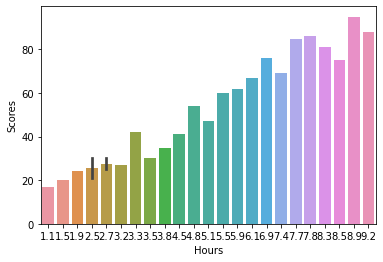

In [16]:
sns.barplot(data['Hours'], data['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

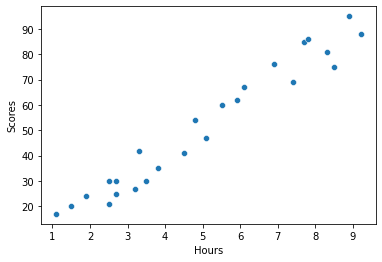

In [17]:
sns.scatterplot(data['Hours'], data['Scores'])

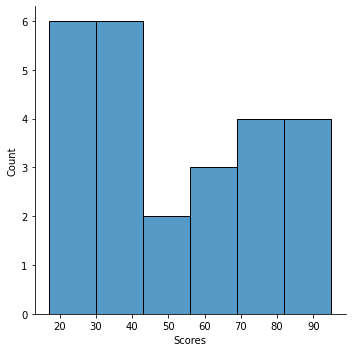

In [18]:
sns.displot(data['Scores'])
plt.show()

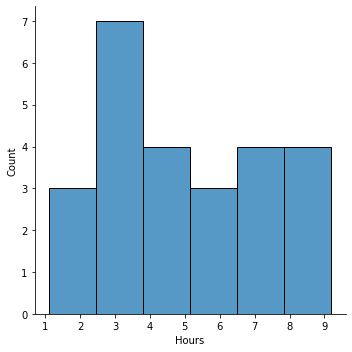

In [19]:
sns.displot(data['Hours'])
plt.show()

<AxesSubplot:xlabel='Scores', ylabel='count'>

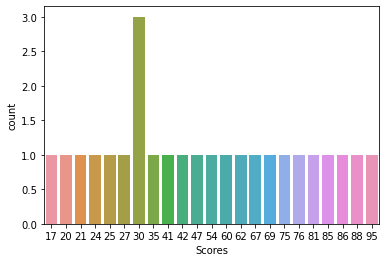

In [20]:
sns.countplot(data['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='count'>

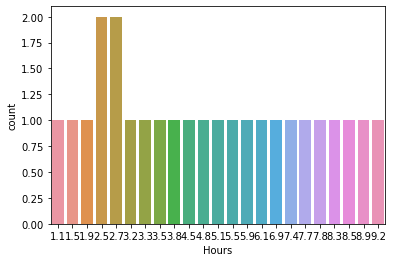

In [21]:
sns.countplot(data['Hours'])


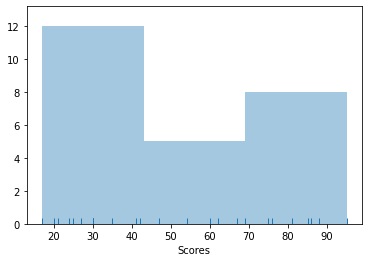

In [22]:
sns.distplot(data['Scores'],kde=False,rug=True)
plt.show()

# Making Predictions

In [23]:
data['predicted_Scores']=b0+b1*data['Hours']

In [24]:
data.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

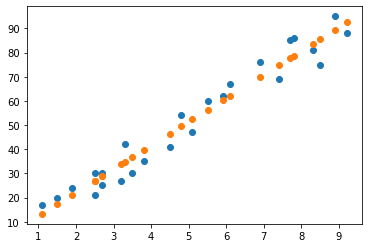

In [25]:
plt.scatter(data['Hours'],data['Scores'])
plt.scatter(data['Hours'],data['predicted_Scores'])
plt.plot()

# Prediction of given value : 9.25

In [26]:
b0+b1*9.25

92.90985477015732

# Root mean square error

In [27]:
y=list(data['Scores'].values)
y_pred=list(data['predicted_Scores'].values)

In [28]:
s=sum([(y_pred[i]-y[i])**2 for i in range (len(data))])
rmse=(np.sqrt(s/len(data)))/mean_y

In [29]:
rmse

0.10439521325937494

# OLS MODEL

In [30]:
import statsmodels.formula.api as smf
model=smf.ols('Scores ~ Hours',data=data)
model=model.fit()

In [31]:
data['pred_ols']=model.predict(data['Hours'])

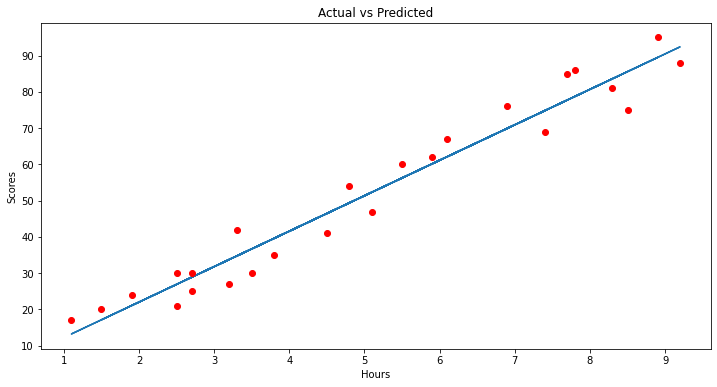

In [32]:
plt.figure(figsize=(12,6))
plt.plot(data['Hours'],data['pred_ols']) #Regression line
plt.plot(data['Hours'],data['Scores'],'ro') #Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# We can observe that the predicted value for 9.25 hours is around 92

# Thank You